In [1]:
#Import libraries and set standars for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import re
import itertools
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words

###################################
rs_filename = 'Gephi/Purple_Telegram.csv'
g_filename = 'Gephi/Serbia_Datalab.csv'
#edge_filename = 'Purple_Data/Badger_Datalab_Edges.csv'
#Telegram_gephi = 'Belarus_Data/Telegram_gephi.csv'

In [6]:
#Reads in data from RedShift social network view and drops irrelevant columns and renames columns to match spacy script columns, turn into a dataframe
def read_rs_data(rs_filename):
    rs_data = pd.read_csv(rs_filename)
    #rs_data.drop(columns=['Unnamed: 0','response_id','response_date','original_doc_type', 'response_doc_type', 'response_language', 'response_num_followers', 'response_num_posts'], inplace=True)
    #rename columns
    #rs_data.columns=['original_id', 'original_author', 'response_author', 'original_date', 'language', 'original_num_followers', 'original_num_posts', 'original_content', 'response_content', 'project']
    rs_df = pd.DataFrame(rs_data)
    #rs_df['original_date'] = pd.to_datetime(rs_df['original_date'], format='%Y-%m-%d %H:%M:%S')
    return rs_df

read_rs_data(rs_filename)

,Unnamed: 0,contentid,content,authoreddate,language,permalink,platform,author,doc_type,parentid,num_followers,num_posts,project
0,0,209868c1-d9c8-5b35-aa4e-5e1759869c21,Губернатор Севастополя Михаил Развожаев принял...,2021-04-25 09:42:20,NaN,telegram.org,telegram,lokacrimea,telegram_stream_message,NaN,NaN,NaN,Purple
1,1,5d89fcbd-87e3-5431-9b32-a963563fb26c,Губернатор Севастополя Михаил Развожаев принял...,2021-04-25 09:42:20,NaN,telegram.org,telegram,lokalkainfo,telegram_stream_message,NaN,NaN,NaN,Purple
2,2,64537a85-1070-5a26-963f-3226a979a068,NaN,2021-04-25 09:39:51,NaN,telegram.org,telegram,tvcrimea24,telegram_stream_message,NaN,NaN,NaN,Purple
3,3,1d30f348-a747-5d08-a55b-ad81e1d5acd2,В Севастополе финальный день регаты «Русская в...,2021-04-25 09:39:51,NaN,telegram.org,telegram,tvcrimea24,telegram_stream_message,NaN,NaN,NaN,Purple
4,4,f8985387-8493-5b99-9d3e-82f37c5a0694,#нампишут Почти как Мальдивы Читательница п...,2021-04-25 09:38:00,NaN,telegram.org,telegram,southlands,telegram_stream_message,NaN,NaN,NaN,Purple
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,6343,220dd2d3-ef09-5695-81ac-893a9ccf845f,NaN,2021-04-14 16:14:19,NaN,telegram.org,telegram,Crimea_algorithm,telegram_stream_message,NaN,NaN,NaN,Purple
6344,6344,568b0526-3c44-5ddf-ae81-1ac89264bc2f,В Симферополе снова начинают работать фонтаны ...,2021-04-14 16:12:34,NaN,telegram.org,telegram,tvcrimea24,telegram_stream_message,NaN,NaN,NaN,Purple
6345,6345,ee69ee12-07cb-53ec-ba33-16171088bf24,NaN,2021-04-14 16:12:34,NaN,telegram.org,telegram,tvcrimea24,telegram_stream_message,NaN,NaN,NaN,Purple
6346,6346,7d96f7f5-0d8f-5f02-8676-92bca0a0732c,"Министр обороны Украины Андрей Таран считает, ...",2021-04-14 16:11:58,NaN,telegram.org,telegram,persimmoncrimea,telegram_stream_message,NaN,NaN,NaN,Purple


In [2]:
#Reads in data from Gephi data table to include modularity groups and drops unnecessary columns then turns the data into a dataframe
def read_g_data():
    g_data = pd.read_csv(g_filename)
    g_data.drop(columns=['Id','timeset','Eccentricity','closnesscentrality', 'harmonicclosnesscentrality', 'betweenesscentrality', 'weighted indegree', 'weighted outdegree', 'Weighted Degree'], inplace=True)
    g_df = pd.DataFrame(g_data)
    return g_df

read_g_data()

,Label,modularity_class,eigencentrality,indegree,outdegree,Degree,clustering
0,KeljevicAndrija,2,0.037542,17,18,35,0.035282
1,StevanOCCRP,6,0.062469,13,89,102,0.002525
2,KRIKrs,0,0.054092,3,1,4,0.500000
3,RuskiCrni,10,0.094673,17,174,191,0.006104
4,Goran_Cuvi_z,17,0.185339,37,6,43,0.051957
...,...,...,...,...,...,...,...
2158,KizaKum,17,0.023816,1,0,1,0.000000
2159,nastasija_m,0,0.000000,0,1,1,0.000000
2160,nasmejaniPas,8,0.000000,0,1,1,0.000000
2161,naplazi,3,0.000000,0,1,1,0.000000


In [9]:
#Merges rs_df and g_df on orginal author to assign modularity class to each row of the rs_data, then turn to dataframe and export to csv
def merge_data(rs_filename, g_filename):
    global rs_df
    rs_df = read_rs_data(rs_filename)
    g_df = read_g_data()
    m_data = rs_df.merge(g_df,left_on='author', right_on='Label')
    global m_df
    m_df = pd.DataFrame(m_data)
    #m_df['original_date'] = pd.to_datetime(m_df['original_date'], format='%Y-%m-%d %H:%M:%S')
    m_df.to_csv('m_data.csv')
    return m_df

merge_data(rs_filename, g_filename)

,Unnamed: 0,contentid,content,authoreddate,language,permalink,platform,author,doc_type,parentid,num_followers,num_posts,project,Label,modularity_class,indegree,outdegree,Degree
0,0,209868c1-d9c8-5b35-aa4e-5e1759869c21,Губернатор Севастополя Михаил Развожаев принял...,2021-04-25 09:42:20,NaN,telegram.org,telegram,lokacrimea,telegram_stream_message,NaN,NaN,NaN,Purple,lokacrimea,6,0,2008,2008
1,8,361ccca6-d2fb-5b9c-8df7-381c8298eb89,В Севастополе 25 апреля открыли купальный сезон,2021-04-25 09:11:03,NaN,telegram.org,telegram,lokacrimea,telegram_stream_message,NaN,NaN,NaN,Purple,lokacrimea,6,0,2008,2008
2,16,d46272f1-0916-5255-99f6-5b59f34ae112,#ВыВТанцах 👀Вот такие «танцы» устроили парни в...,2021-04-25 08:14:11,NaN,telegram.org,telegram,lokacrimea,telegram_stream_message,NaN,NaN,NaN,Purple,lokacrimea,6,0,2008,2008
3,17,75b3d66b-057c-5865-85e2-3e4f82d831ab,"✔️На территории Херсонеса, к слову, снимали фи...",2021-04-25 08:13:29,NaN,telegram.org,telegram,lokacrimea,telegram_stream_message,NaN,NaN,NaN,Purple,lokacrimea,6,0,2008,2008
4,19,853fdd64-6ed2-527c-a473-d661b10184e2,В Ялте ночью сгорел трехэтажный жилой дом на ...,2021-04-25 08:12:26,NaN,telegram.org,telegram,lokacrimea,telegram_stream_message,NaN,NaN,NaN,Purple,lokacrimea,6,0,2008,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,5092,40228e1b-8ea9-5f8d-ba51-206770e627f2,Эпидемиологический порог по ОРВИ превышен в Се...,2021-04-19 12:13:58,NaN,telegram.org,telegram,NewSevastopolOnline,telegram_stream_message,NaN,NaN,NaN,Purple,NewSevastopolOnline,0,0,27,27
6344,5336,7dcbc21d-269c-53ab-9978-52e440baee5c,Губернатор Севастополя Михаил Развожаев сделал...,2021-04-15 08:49:50,NaN,telegram.org,telegram,NewSevastopolOnline,telegram_stream_message,NaN,NaN,NaN,Purple,NewSevastopolOnline,0,0,27,27
6345,5598,f05191f5-f233-510a-b4a6-1cbb910787a2,Охота полностью запрещена в Севастополе. Все т...,2021-04-12 12:04:40,NaN,telegram.org,telegram,NewSevastopolOnline,telegram_stream_message,NaN,NaN,NaN,Purple,NewSevastopolOnline,0,0,27,27
6346,5727,1f02a318-5e19-5881-8421-c7f23d818a5b,"Мобильная амбулатория, где можно сделать приви...",2021-04-12 07:57:30,NaN,telegram.org,telegram,NewSevastopolOnline,telegram_stream_message,NaN,NaN,NaN,Purple,NewSevastopolOnline,0,0,27,27


In [10]:
#Reads in data from RedShift social network view and drops irrelevant columns and renames columns to match spacy script columns, turn into a dataframe
def read_tg_data(Telegram_gephi):
    tg_data = pd.read_csv(Telegram_gephi)
    global tg_df
    tg_df = pd.DataFrame(tg_data)
    return tg_df

read_tg_data(Telegram_gephi)

,Id,Label,timeset,modularity_class,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality
0,_,_,NaN,0,1,1.0,1.0,0
1,ничегоочень,ничегоочень,NaN,0,0,0.0,0.0,0
2,a,a,NaN,2,1,1.0,1.0,0
3,жыве беларусь,жыве беларусь,NaN,2,0,0.0,0.0,0
4,a r,a r,NaN,1,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...
1894,проведём,проведём,NaN,12,0,0.0,0.0,0
1895,смелым перамога,смелым перамога,NaN,10,1,1.0,1.0,0
1896,слева,слева,NaN,10,0,0.0,0.0,0
1897,юрий,юрий,NaN,2,1,1.0,1.0,0


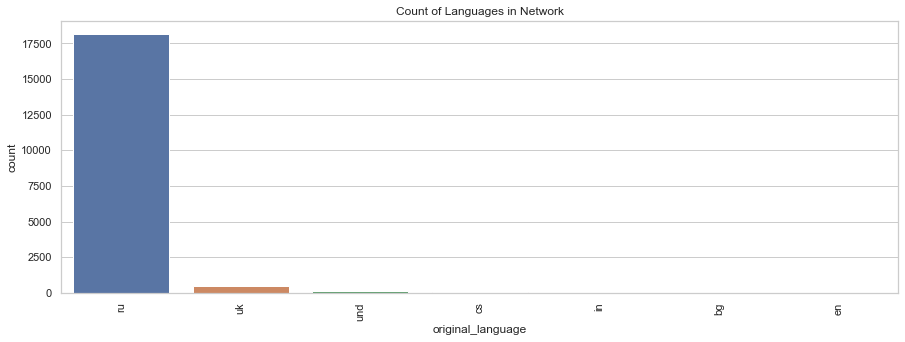

In [64]:
def plot_lang():
    plt.subplots(figsize=(15,5))
    p1 = sns.countplot(x = 'original_language',
              data = m_df,
              order = m_df['original_language'].value_counts().index)

    plt.xticks(rotation=90);
    plt.title('Count of Languages in Network')
    plt.show()

plot_lang()

In [195]:
#Top users people based on Eigenvector Centrality 
def plot_kis():
    tg_kis = tg_df[tg_df['eigencentrality'] >= .127]
    tg_kis.to_csv('kis_eigenvector_telegram.csv')
    plt.subplots(figsize=(12,4))
    p1 = sns.scatterplot(x = 'label', y = 'eigencentrality', data=tg_kis, legend=None)
    plt.xticks(rotation=70);
    plt.title('Key Influencers by EigenCentrality', size=14)
    plt.savefig('Network_EigenCentality_telegram.png')
    return plt.show()

plot_kis()


KeyError: 'eigencentrality'

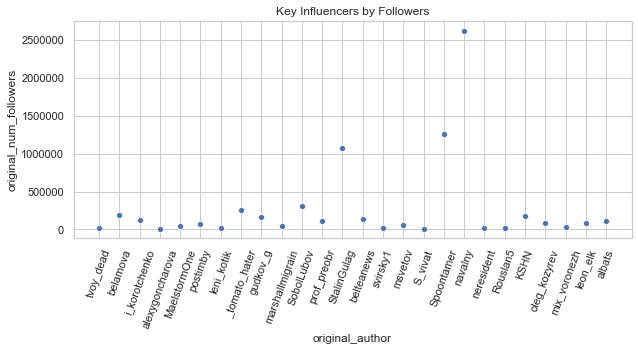

In [187]:
#Users with highest follower count
def plot_kis_fol():
    df_kis = m_df[m_df['original_num_followers'] >= 10000]
    df_kis.to_csv('kis_followers.csv')
    plt.subplots(figsize=(10,4))
    p1 = sns.scatterplot(x = 'original_author', y = 'original_num_followers', data=df_kis)
    plt.xticks(rotation=70);
    plt.title('Key Influencers by Followers')
    plt.savefig('Network_TopFollowing.png')
    return plt.show()

plot_kis_fol()

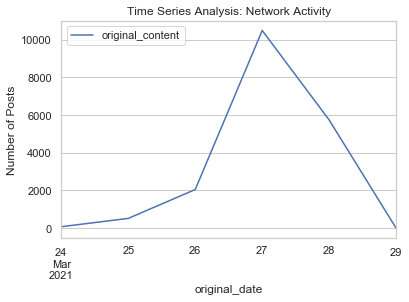

In [67]:
def content_timeline(rs_df):
    rs_df = rs_df.set_index('original_date')
    df1 = rs_df.resample('D').agg({"original_content":'count'})
    df1.plot()
    plt.title('Time Series Analysis: Network Activity')
    plt.ylabel('Number of Posts')
    plt.savefig('NetworkActivity.png')
    plt.show()
    
content_timeline(rs_df)


#####Plot a line per rule tag or project id or per lang

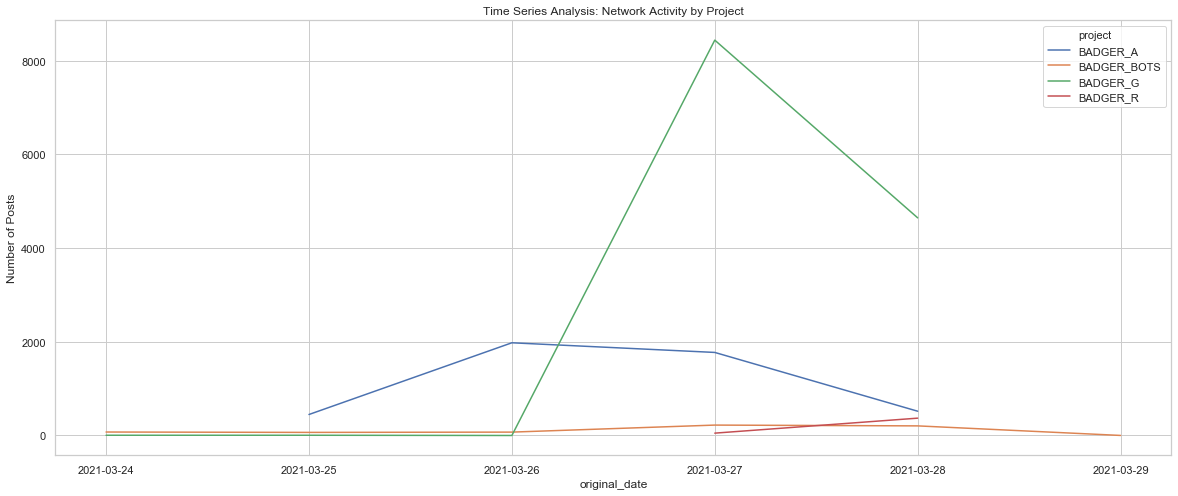

In [68]:
def content_timeline(m_df):
    m_df = m_df.set_index('original_date')
    df1 = m_df.groupby('project').resample('D').mean({"original_content":'count'})
    df1 = df1.reset_index()
    
    fig = plt.gcf()
    fig.set_size_inches(20, 8)
    sns.lineplot('original_date', 'original_content', hue='project', data=df1)
    
    plt.title('Time Series Analysis: Network Activity by Project')
    plt.ylabel('Number of Posts')
    plt.savefig('NetworkActivity_Project.png')
    plt.show()
    
content_timeline(m_df)


#####Plot a line per rule tag or project id or per lang

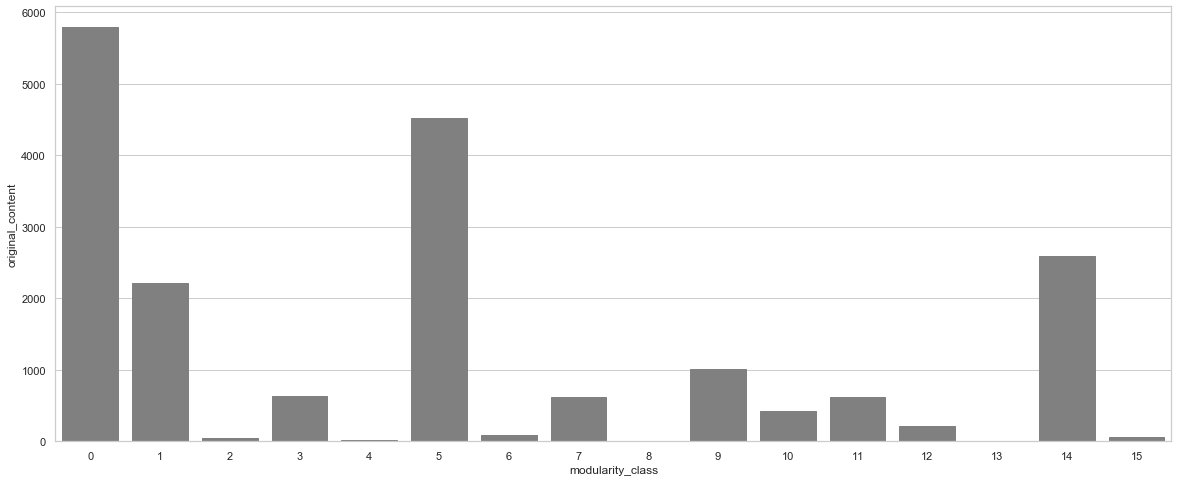

In [155]:
def content_timeline(m_df):
    m_df = m_df.set_index('original_date')
    df1 = m_df.groupby('modularity_class').resample('M').mean({"original_content":'count'})
    df1 = df1.reset_index()
    df1.to_csv('content_modclass.csv')

    fig = plt.gcf()
    fig.set_size_inches(20, 8)
    ax = sns.barplot('modularity_class', 'original_content', data=df1)
    
    for bar in ax.patches:
        if bar.get_label() == '6':
            bar.set_color('red')    
        else:
            bar.set_color('grey')

    #plt.gca().get_xticklabels()[3].set_color("red")
    
    
    #Determine the color for each x-axis plot
    
    #df1.plot()
    #plt.title('Time Series Analysis: Poland TA Activity near Time of March Boycott')
    #plt.ylabel('Number of Posts')
    #plt.show()
    
content_timeline(m_df)

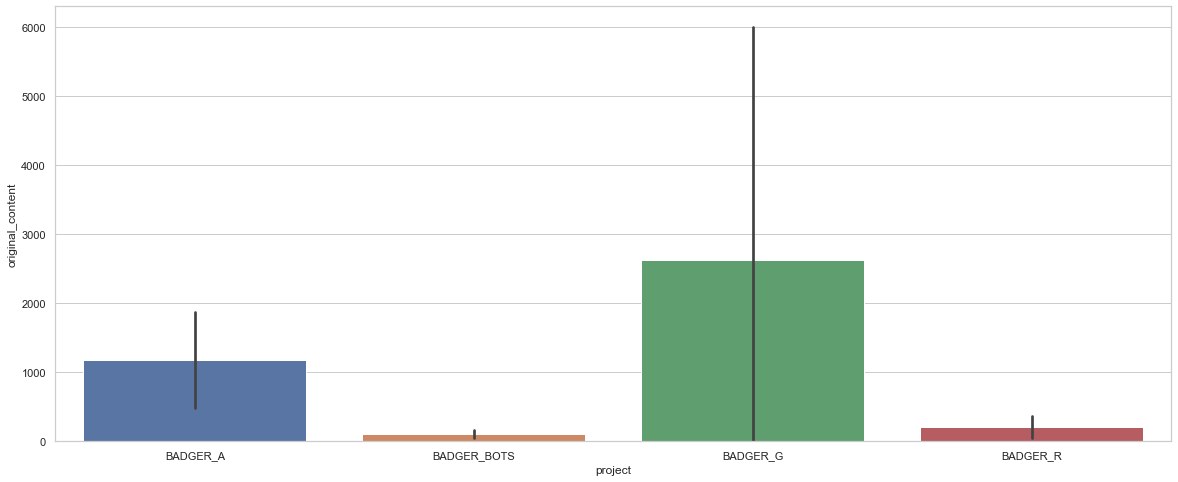

In [70]:
def content_project(m_df):
    m_df = m_df.set_index('original_date')
    df1 = m_df.groupby('project').resample('D').mean({"original_content":'count'})
    df1 = df1.reset_index()
    
    fig = plt.gcf()
    fig.set_size_inches(20, 8)
    sns.barplot('project', 'original_content', data=df1)
    #Determine the color for each x-axis plot
    
    #df1.plot()
    #plt.title('Time Series Analysis: Poland TA Activity near Time of March Boycott')
    #plt.ylabel('Number of Posts')
    #plt.show()
    
content_project(m_df)

In [137]:
#Top Co-Appearances
def edge_list_words():
    filtered = m_df[m_df['response_author'].isin(m_df['original_author'].unique())]
    global result
    result = filtered.rename(columns={'original_author': 'Source', 'response_author': 'Target'}) \
                 .groupby(['Source', 'Target']) \
                 .size() \
                 .reset_index(name='Weight')
    return result

edge_list_words()

topco_df = result[result['Weight'] >= 8]
topco_df
#return co_df
    
#Add mod group for each source node
#Add mod group for each target node
    
#co_appearances()

,Source,Target,Weight
36,PachvaraBelarus,TundraKatzap,9
73,_tomato_hater,NMGXm9MvvoFHAPW,12
76,_tomato_hater,_tomato_hater,11
83,_tomato_hater,just_stop_me,8
85,_tomato_hater,lin_naaayyy,8
86,_tomato_hater,madchapick,12
90,_tomato_hater,vkryta_zoryamy,8
111,amebakin,amebakin,11
199,evrlstng_winter,evrlstng_winter,13
240,madchapick,_tomato_hater,8


In [ ]:
#In-Network Co-appearances vs out-network